In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

## Muller's Method
이는 Quadratic interpolation (이차 보간 방법)을 사용한 secant method이다.

[출처](https://qt3b1s62da6s.tistory.com/414)

선형 보간법이나 이거나 다 Lagrange family 라그랑지 패밀리 안에 포함된다. 무슨 말이냐.

선분을 그으려면 점 두 개가 필요하다. 2차 함수를 그으려면? 점 세 개가 필요하다. 3차 함수는? 점 네 개가 필요하다.

분명 1차 함수를 쓰는 것 보다는 2차 함수를 쓰는 것이 좀 더 해가 좋을 것이다. 그리고 3차 함수를 쓰는 것이 해가 2차 함수를 쓰는 것 보다 좋을 것이라 예상할 수 있다. 그러니까 interpolating function의 차수를 하나씩 늘려가면 interpolation의 질을 더 좋게 할 수 있다. 이런 식으로 interpolating 하는 것을 Lagrange 아저씨가 제일 먼저 한 모양이다. 그래서 이런 식의 interpolation function을 Lagrange family 라고 부른다.

만약에 0.9와 1.2와 1.5에서의 함수값을 알 때 1.4에서의 함수값을 계산하고 싶다. 
그러면 이차 방정식 꼴을 유도하여, (블로그 참조)

a$x^2$ + b$x$ + c = $y$
에서 a, b, c에 대한 값을 각각의 값을 넣어 구하고, 이를 대입하여, $y$에 대한 식을 구한다
이후, 1.4 값을 대입하면, $y$ = 0,9850 이 나오는데, 만약 정해(실제로 함수의 꼴이 sin함수라면) $y$ = 0.9854로 2차 함수를 쓸 때, 1차 함수일 때 보다 더 interpolation의 질이 좋아졌다고 한다. 이렇게 구한 것이 linear interpolation이라고 함.

아래는 1차, 2차, 정해를 비교해 놓은 그림이다.
녹색 점선이 정해, 검은색 x표시가 quadratic interploation이다. 빨간 x표시보다 정해에 더 가깝다는 것을 알 수 있다.

<center><figure>
<img src = "https://t1.daumcdn.net/cfile/tistory/275D2A4D5331EFB509?original">


Muller's Formula

<center><figure>
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/Muller-Method.png" width="400">
  <figcaption>Image from https://www.geeksforgeeks.org/program-muller-method/</figcaption>
</figure></center>

$$
Q(t) = At^2 + Bt + C
$$

$Q(t) = 0 $ 은 복잡한 근을 찾을 수 있게 한다.

$$
t = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}
=
-\frac{2C}{B \pm \sqrt{B^2 - 4AC}}
$$

본론으로 들어와서, 0에 가까운 루트를 선택해야하는데,
첫 번째 형태의 가장 작은 분자 또는 두 번째 형태의 가장 큰 분모를 선택하는 기호를 선택해야한다. 
(그러나 수치 계산에서는 두 번째 형태는 같은 숫자의 뺄셈으로 인한 반올림 오류를 피하기 위해 바람직하다.

# ???이차방정식 해 저렇게 바뀌나



A function $y = f(x)$ goes through the three points, $(x_0, y_0)$, $(x_1, y_1)$, and $(x_2, y_2)$.
We would like to find a root of $f(x) = 0$ closer to $x_2$.
By making change of variable $t = x - x_2$, the problem becomes finding a root $t$ closer to $0$.

Demanding $Q(0) = y_2$, $Q(t_1) = y_1$, and $Q(t_0) = y_0$ with $t_1 = x_1 - x_2$ and $t_0 = x_0 - x_2$, a parabola that goes through the three points is constructed with the coefficients

$$
\begin{aligned}
A &= \frac{1}{t_0 - t_1} \left(\frac{y_0 - y_2}{t_0} - \frac{y_1 - y_2}{t_1}\right) \\
B &= -\frac{1}{t_0 - t_1} \left(t_1\frac{y_0 - y_2}{t_0} - t_0\frac{y_1 - y_2}{t_1}\right) \\
C &= y_2 \\
\end{aligned}
$$

The next approximation $x_3$ is produced by the following formulas,

$$
x_3 = x_2 - \frac{2C}{B \pm \sqrt{B^2 - 4AC}}
$$

where the sign in the denominator is chosen such that $\left|B \pm \sqrt{B^2 - 4AC}\right|$ is maximized.

## Algorithm

1. Starting from the three initial values ${x_0, x_1, x_2}$, find the next approximation $x_3$ according to Muller's formula:

    $$
    x_3 = x_2 - \frac{2C_2}{B_2 \pm \sqrt{B_2^2 - 4A_2C_2}}
    $$
    
2. We then use this new value $x_3$ and repeat the process, using ${x_3, x_2, x_1}$ as the initial values, solving for $x_4$, $x_5$, etc.:

    $$
    \begin{aligned}
    x_4 &= x_3 - \frac{2C_3}{B_3 \pm \sqrt{B_3^2 - 4A_3C_3}}, \\
    x_5 &= x_4 - \frac{2C_4}{B_4 \pm \sqrt{B_4^2 - 4A_4C_4}}, \\
    &\ \vdots \\
    x_n &= x_{n - 1} - \frac{2C_{n - 1}}{B_{n - 1} \pm \sqrt{B_{n - 1}^2 - 4A_{n - 1}C_{n - 1}}}, \\
    \end{aligned}
    $$
    
3. The iteration stops when we reach a sufficiently high level of precision (a sufficiently small difference between $x_n$ and $x_{n - 1}$).

*Note* that $x_n$ can be complex.

# Implementation

In [22]:
import cmath

def muller_while(f, x0x1x2, predicate):
    """Muller 방식으로 root값 구하는 함수
    
    :param f:
        f(x)
    :param x0x1x2:
        Three initial guesses
    :param predicate:
        A callable that accepts three arguments:
        A predicate function which takes three arguments
            - i : the iteration count 즉, 횟수
            - xy : a pair of the midpoint and the function value in the current iteration :현재 반복에서 중간점과 함수 값의 쌍
            - dx : the change of the x value :x값의 변화 정도
        and returns boolean: #불 연산자를 return 함
            - If True, the search continues.   True면 조사가 연속적이다
            - If False, the search terminates. False면 조사가 한계가 있다.
            
    이것과 비교하여 이해
    supergolden = muller_while(lambda x: x ** 3 - x ** 2 - 1, (1, 2, 3), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-10) #dx값을 while을 이용하여
    """
    x0, x1, x2 = map(complex, x0x1x2)
    #Map함수에 int, complex를 넣고 만들면, 마치 변수 하나에 세개를 압축하듯, 자유자재로 정수나 복소수를 하나의 변수에 저장할 수 있다.
    
    f0, f1, f2 = f(x0), f(x1), f(x2) 
    i, x3, f3 = 0, float("nan"), float("nan")
    #일단 튜플로 나타내지만, 각각의 값은 변할 수 있음. 그리고 그걸 이용해서 계속하여 함수를 반복시킬 거다.
    
    def muller_root():
        nonlocal i, x3, f3
        
        t0   , t1,   =  x0 - x2     , x1 - x2
        term0, term1 = (f0 - f2)/t0, (f1 - f2)/t1
        denom = t0 - t1
        
        A = (term0 - term1) / denom
        B = (t0*term1 - t1*term0) / denom
        C = f2    
        #각각의 계수를 구하는 위의 공식에 똑같이 대입한 것, 어렵지 않다.
        
        sqrt_discriminant = cmath.sqrt(B**2 - 4*A*C)
        dx = -2*C / max(B + sqrt_discriminant, B - sqrt_discriminant, key = abs) 
        x3 = x2 + dx #x3을 구하는 근의 공식 완성
        f3 = f(x3) #x3을 넣었을 때 함수 값.
        i += 1 #횟수 증가
        return i, (x3, f3), dx #xy[1] = f3을 뜻함, 즉 함수 값이 원하는 만큼 작아지면, 그만큼 횟수가 증가하며 정확도가 증가하겠지.
    
    while predicate(*muller_root()):
        x0, x1, x2 = x1, x2, x3 #계산하여 나온 x1, x2, x3을 초기값으로 돌림
        f0, f1, f2 = f1, f2, f3 #계산하여 나온 f1, f2, f3값을 다시 초기값으로 돌림 
    #그리고 lambda의 조건문을 달성시킬 때 까지 다시 반복시킴
    return x3

In [19]:
#Map함수에 int, complex를 넣고 만들면, 마치 변수 하나에 세개를 압축하듯, 자유자재로 정수나 복소수를 하나의 변수에 저장할 수 있다.
a0a1a2 = 1, 2, 3
a0, a1, a2 = map(int, a0a1a2)
print(a0, a1, a2)

1 2 3


In [8]:
supergolden = muller_while(lambda x: x ** 3 - x ** 2 - 1, (1, 2, 3), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-10)
supergolden

(1.4655712318916674+0j)

## Notice the result can be complex.

# Complex Logarithm(복소 대수)

In [51]:
z0z1z2 = (1 + .1j, 1 + .5j, 1 + .9j)

z_approx = muller_while(lambda z: 1j * cmath.log(z) + cmath.pi/2, z0z1z2,
                        lambda i, zf, dz: abs(zf[1]) > 1e-10)

print(f"real(z) = {z_approx.real}, imag(z) = {z_approx.imag}")

real(z) = 1.0508778904275348e-16, imag(z) = 1.0


# Two-Stream Instability

two-stream instability = 흔한 플라즈마 물리의 불안정성.
그것은 플라즈마안에 주입되는 전기입자들의 흐름으로 발생, 아니면 다른 종(이온이나 전자)가 다른 drift Velocities를 가질 수 있도록 플라즈마를 따라 전류를 설정하면서 발생.
입자의 에너지는 플라즈마파의 excitation으로 발생할 수 있다.

cold, uniform(같은 형태의), 자성이 없는 플라즈마를 고려해보자. 이온은 고정되어 있고 전자들은 $v_0$의 속도를 가질때, dispersion relation(분산관계)는


$$
(1)　　　\omega_p^2 \left[\frac{m_e/m_i}{\omega^2} + \frac{1}{(\omega - k v_0)^2}\right] 
$$

이때, where $\omega$ is the wave frequency, $k$ the wave number, $m_e/m_i$ the ratio of electron-to-ion mass, and $\omega_p$ is the electron plasma frequency.

그리고

For $k \rightarrow \infty$, we find

$$
(2)　　　　　f_k(\omega) \approx \omega_p^2 \frac{m_e/m_i}{\omega^2} - 1
$$

Therefore, the solution of $f_k(\omega) = 0$ for large $k$ should approach

$$
(3)　　　　　\omega(k \rightarrow \infty) = \sqrt{\frac{m_e}{m_i}} \omega_p
$$

Assuming, $v_0 = \omega_p = 43$ and $m_e/m_i = 1/43^2$,
we search for roots of $f_k(\omega) = 0$ starting from a large value of $k$ and moving to small values:

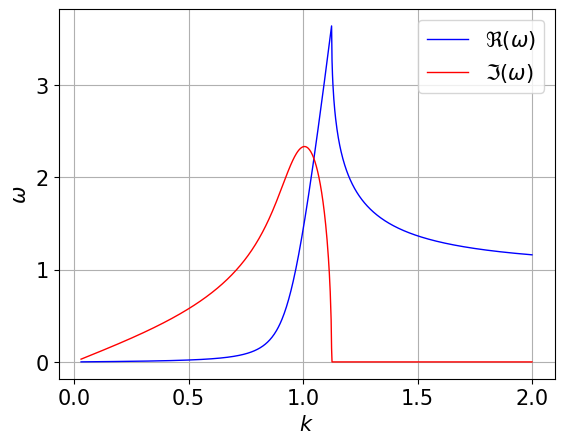

In [60]:
# f_k(w)를 정의
def dispersion_relation(k, w):
    v0, wp, me_mi = 43, 43, 1 / 43**2
    return 1 - wp**2 * (me_mi/w**2 + 1/(w - k*v0)**2)
# 어려운 것 없이 1번 식에 대입.

# k가 주어지면 관계를 푸는 함수를 정의
def single_step(k, winit):
    max_w = max(winit, key = abs)
    # key에 함수를 값으로 넣는다. 여기엔 lambda도 이용할 수 있다. key= function을 기준으로 최대, 최솟값을 찾는다.
    # 즉, max_w는 winit 요소 중에서 절댓값으로 최대인 것을 뽑아낸다.
    
    return muller_while(lambda w: dispersion_relation(k, w), winit,
                       lambda i, xy, dw: abs(dw) > 1e-7*abs(max_w) )
    #winit은 복소수의 꼴을 받기 때문에, 크기의 한도를 정할때 abs를 통해서 그 한도를 정해야 한다. 이것이 위에 것과의 차이임.
    

# define the k space
ks = np.linspace(2, .03, 1000)

# fist three gusses of omega 
# k가 커지면 $w_p / (m_e/m_i) = 1$
ws = [1 + .1j, 1, 1. - .1j]

#k 값을 넘어 solution을 찾자
for k in ks:
    ws.append(single_step(k, ws[-3:]))
    
# 처음 three guesses를 지우자.
ws = ws[3:]

plt.figure()
plt.plot(ks, [w.real for w in ws], "-b", linewidth = 1, label = "$\\Re(\\omega)$")
plt.plot(ks, [w.imag for w in ws], "-r", linewidth = 1, label = "$\\Im(\\omega)$")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.grid()
plt.show()

In [65]:
# f_k(w)를 정의
def dispersion_relation(k, w):
    v0, wp, me_mi = 43, 43, 1 / 43**2
    return 1 - wp**2 * (me_mi/w**2 + 1/(w - k*v0)**2)
# 어려운 것 없이 1번 식에 대입.

# k가 주어지면 관계를 푸는 함수를 정의
def single_step(k, winit):
    max_w = max(winit, key = abs)
    # key에 함수를 값으로 넣는다. 여기엔 lambda도 이용할 수 있다. key= function을 기준으로 최대, 최솟값을 찾는다.
    # 즉, max_w는 winit 요소 중에서 절댓값으로 최대인 것을 뽑아낸다.
    
    return muller_while(lambda w: dispersion_relation(k, w), winit,
                       lambda i, xy, dw: dw > 1e-7*max_w)
    # winit은 복소수의 꼴을 받기 때문에, 크기의 한도를 정할때 abs를 통해서 그 한도를 정해야 한다. 이것이 위에 것과의 차이임.
    # 아래 보면 알 수 있듯이, complex와 complex(int든 float든 다)는 비교가 불가능, 연산하려면 complex는 반드시 abs 꼴이여야 함.
    

# define the k space
ks = np.linspace(2, .03, 1000)

# fist three gusses of omega 
# k가 커지면 $w_p / (m_e/m_i) = 1$
ws = [1 + .1j, 1, 1. - .1j]

#k 값을 넘어 solution을 찾자
for k in ks:
    ws.append(single_step(k, ws[-3:]))
    
# 처음 three guesses를 지우자.
ws = ws[3:]

plt.figure()
plt.plot(ks, [w.real for w in ws], "-b", linewidth = 1, label = "$\\Re(\\omega)$")
plt.plot(ks, [w.imag for w in ws], "-r", linewidth = 1, label = "$\\Im(\\omega)$")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.grid()
plt.show()

TypeError: '>' not supported between instances of 'complex' and 'complex'

[(1+0.1j), 1, (1-0.1j)]
(-0.226408981301649+0.1954570540070357j)
(-0.2559169550173013+0j)
(-0.226408981301649-0.1954570540070357j)
(0.02440445630310517+0j)
(-0.0012442868052531253-0.0010931224994741521j)
(-1.7867086223866124e-06-1.0539526262093738e-05j)
(2.0916623988398442e-10-3.39121711474236e-10j)
(1.1102230246251565e-16-5.787214873207074e-18j)
(-0.2564283183346219+0j)
(-0.22692034036812614-0.1954552483023905j)
(-0.0005142640313564595-5.787132300619374e-18j)
(2.6428932530464522e-05+2.3524137349935296e-05j)
(-7.629976650491699e-10-4.767885294533416e-09j)
(3.3306690738754696e-16-6.809153785361588e-17j)
(-0.22743323362547163-0.195453435370758j)
(-0.0010300738954278632-5.7870493969246544e-18j)
(-0.0005158172351054091-6.80905613649438e-17j)
(1.0958739782296334e-07+8.931900830463835e-08j)
(-5.3512749786932545e-14-4.3699901875547415e-14j)
(-2.220446049250313e-16-4.533773106948065e-24j)
(-0.0015474357939453398-5.786966160461623e-18j)
(-0.0010331865342432245-6.80895809567113e-17j)
(-0.0005173

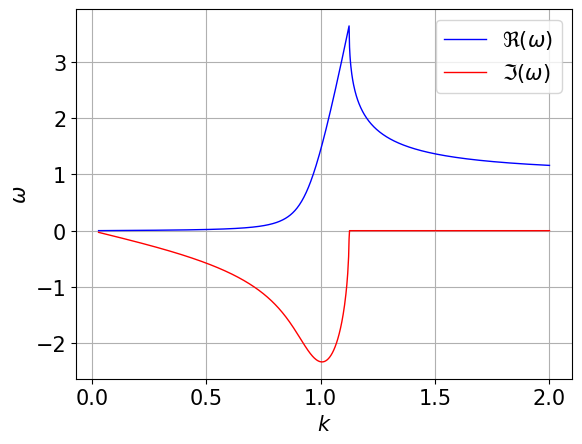

In [76]:
# f_k(w)를 정의
def dispersion_relation(k, w):
    v0, wp, me_mi = 43, 43, 1 / 43**2
    print(1 - wp**2 * (me_mi/w**2 + 1/(w - k*v0)**2))
    return 1 - wp**2 * (me_mi/w**2 + 1/(w - k*v0)**2)
# 어려운 것 없이 1번 식에 대입.

# k가 주어지면 관계를 푸는 함수를 정의
def single_step(k, winit):
    max_w = max(winit, key = abs)
    # key에 함수를 값으로 넣는다. 여기엔 lambda도 이용할 수 있다. key= function을 기준으로 최대, 최솟값을 찾는다.
    # 즉, max_w는 winit 요소 중에서 절댓값으로 최대인 것을 뽑아낸다.
    
    return muller_while(lambda w: dispersion_relation(k, w), winit,
                       lambda i, xy, dw: abs(dw) > 1e-7 )
    #winit은 복소수의 꼴을 받기 때문에, 크기의 한도를 정할때 abs를 통해서 그 한도를 정해야 한다. 이것이 위에 것과의 차이임.
    # 이렇게 되면 위와 달리 그래프가 반대로 뒤집혀짐. 이는 절댓값을 안취하면 dispersion_relation에 의하여 음수 값이 나오고, 음수값은 항상 1e-7보다 작기때문에
    # 모든 x 값에 대하여 muller_while이 진행되고 그로 인해 나오는 결과값이 그래프에 그려짐에 따라 음수값이 그려지게 되는 것.

# define the k space
ks = np.linspace(2, .03, 1000)

# fist three gusses of omega 
# k가 커지면 $w_p / (m_e/m_i) = 1$
ws = [1 + .1j, 1, 1. - .1j]
print(ws)
#k 값을 넘어 solution을 찾자
for k in ks:
    ws.append(single_step(k, ws[-3:]))

# 처음 three guesses를 지우자.
ws = ws[3:]

plt.figure()
plt.plot(ks, [w.real for w in ws], "-b", linewidth = 1, label = "$\\Re(\\omega)$")
plt.plot(ks, [w.imag for w in ws], "-r", linewidth = 1, label = "$\\Im(\\omega)$")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.grid()
plt.show()

In [49]:
winit = [-4, -3, -2]
max_w = max(winit)
max_s = max(winit, key = abs)
print(f" 정수로 봤을 때 가장 큰 수{max_w}, 절댓값으로 봤을 때 가장 큰 수: {max_s}")

 정수로 봤을 때 가장 큰 수-2, 절댓값으로 봤을 때 가장 큰 수: -4


우리는 파동의 빈도(작은 k에 대해서 복소수의 꼴을 가지는)를 볼 수 있고, 그 지역에서 파동의 상승과 댐핑을 가리킨다.